In [ ]:
pip install ucimlrepo

In [ ]:
#@title Load Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

# metadata
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

# variable information
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [ ]:
# Lihat Kondisi Data
import pandas as pd
import numpy as np

data = pd.concat([X, y], axis=1)

# 1. Missing Values
missing_values_count = data.isnull().sum()
missing_values_percent = (missing_values_count / len(data)) * 100
print("=== Missing Values ===")
print(pd.DataFrame({"Missing Count": missing_values_count, "Missing %": missing_values_percent}))

# 2. Duplicate Data
duplicates_count = data.duplicated().sum()
print("\n=== Duplicate Data ===")
print(f"Ada duplicate: {'Ya' if duplicates_count > 0 else 'Tidak'}, Jumlah: {duplicates_count}")

# 3. Outliers
print("\n=== Outliers (IQR method) ===")
for col in X.select_dtypes(include=np.number).columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = X[(X[col] < Q1 - 1.5*IQR) | (X[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"Fitur {col} memiliki {len(outliers)} outliers")
    else:
        print(f"Fitur {col} tidak ada outliers")

# 4. Imbalanced Data
print("\n=== Imbalanced Data ===")
class_counts = y.value_counts()
print(class_counts)
print("Rasio kelas:", class_counts.min() / class_counts.max())

# 5. Noise
print("\n=== Noise Check ===")
for col in X.select_dtypes(include=np.number).columns:
    negative_values = (X[col] < 0).sum()
    if negative_values > 0:
        print(f"Fitur {col} memiliki {negative_values} nilai negatif (mungkin noise)")

# 6. Data Quality Issues
print("\n=== Data Quality Issues ===")
for col in X.columns:
    if X[col].dtype == object:
        unique_values = X[col].unique()
        print(f"Fitur {col} memiliki tipe object, contoh nilai: {unique_values[:5]}")

=== Missing Values ===
           Missing Count  Missing %
RIAGENDR               0        0.0
PAQ605                 0        0.0
BMXBMI                 0        0.0
LBXGLU                 0        0.0
DIQ010                 0        0.0
LBXGLT                 0        0.0
LBXIN                  0        0.0
age_group              0        0.0

=== Duplicate Data ===
Ada duplicate: Tidak, Jumlah: 0

=== Outliers (IQR method) ===
Fitur RIAGENDR tidak ada outliers
Fitur PAQ605 memiliki 410 outliers
Fitur BMXBMI memiliki 88 outliers
Fitur LBXGLU memiliki 104 outliers
Fitur DIQ010 memiliki 79 outliers
Fitur LBXGLT memiliki 121 outliers
Fitur LBXIN memiliki 150 outliers

=== Imbalanced Data ===
age_group
Adult        1914
Senior        364
Name: count, dtype: int64
Rasio kelas: 0.19017763845350052

=== Noise Check ===

=== Data Quality Issues ===


In [ ]:
#@title Cek Kolom fitur

print("Kolom fitur (X):")
print(X.columns.tolist())
display(X)

Kolom fitur (X):
['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
# Cek Data Tyoe
X.dtypes

,0
RIAGENDR,float64
PAQ605,float64
BMXBMI,float64
LBXGLU,float64
DIQ010,float64
LBXGLT,float64
LBXIN,float64


In [ ]:
# Cek Missing Value Fitur

print("Missing values pada fitur (X):")
X.isnull().sum()

Missing values pada fitur (X):


,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [ ]:
#@title Cek Kolom label

print("Kolom label (y):")
print(y.columns.tolist())
display(y)

Kolom label (y):
['age_group']


,age_group
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
2273,Adult
2274,Adult
2275,Adult
2276,Adult


In [ ]:
# Cek data types
y.dtypes

,0
age_group,object


In [ ]:
# Cek Missing Value Label

print("Missing values pada Label (y):")
y.isnull().sum()

Missing values pada Label (y):


,0
age_group,0


# **Visualisasi Data**

In [ ]:
#@title Histogram Distribusi Data

import plotly.express as px
import pandas as pd

df_plot = X.copy()

fig = px.histogram(
    df_plot.melt(),
    x='value',
    color='variable',
    barmode='overlay',
    opacity=0.55
)

fig.update_layout(
    title="Histogram - Distribusi Semua Fitur",
    xaxis_title="Nilai Fitur",
    yaxis_title="Jumlah Data",
    legend_title="Fitur"
)

fig.show()

In [ ]:
#@title Scatter Plot BMI vs Glucose dengan label age_group

import plotly.express as px

fig = px.scatter(
    X,
    x="BMXBMI",
    y="LBXGLU",
    color=y['age_group'],
    labels={'BMXBMI': 'BMI', 'LBXGLU': 'Glucose', 'color': 'Age Group'},
    title="BMI vs Glucose berdasarkan Age Group",
    hover_data={
        "RIAGENDR": True,
        "PAQ605": True,
        "BMXBMI": True,
        "LBXGLU": True,
        "DIQ010": True,
        "LBXGLT": True,
        "LBXIN": True,
        "age_group": y["age_group"]
    }
)

fig.show()

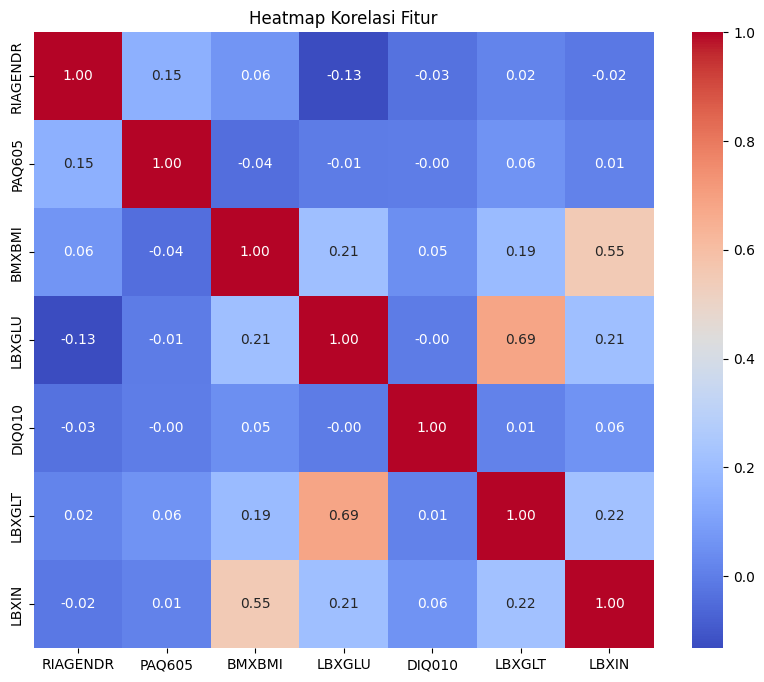

In [ ]:
#@title Heatmap korelasi (hubungan antar fitur)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gabungkan fitur dan target untuk analisis
data = X.copy()
data['ActualAge'] = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.original['RIDAGEYR']

plt.figure(figsize=(10,8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **Train - Test - Split**

In [ ]:
from sklearn.model_selection import train_test_split

# training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

#  training dan validasi
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

print("Jumlah data training: {}".format(len(X_train)))
print("Jumlah data validasi: {}".format(len(X_val)))
print("Jumlah data testing: {}".format(len(X_test)))

Jumlah data training: 1457
Jumlah data validasi: 365
Jumlah data testing: 456


# **FEATURE ENGINEERING**

In [ ]:
#@title One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder()
ohe.fit(y[['age_group']])
hasil = ohe.transform(y[['age_group']]).toarray()
print(ohe.categories_)

#Tampilkan Hasil OHE
pd.DataFrame(hasil, columns=ohe.categories_[0])

[array(['Adult', 'Senior'], dtype=object)]


,Adult,Senior
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2273,1.0,0.0
2274,1.0,0.0
2275,1.0,0.0
2276,1.0,0.0


In [ ]:
#@title StandarScaler

from sklearn.preprocessing import StandardScaler
import pandas as pd

fitur_numerik = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[fitur_numerik])

X_scaled_df = pd.DataFrame(X_scaled, columns=fitur_numerik)
X_scaled_df.head()

,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,1.068639,0.584085,0.744323,0.316487
1,-1.056270,-0.590024,-0.743427,-0.821762
2,-0.656125,-0.590024,-0.998470,-0.586084
3,0.130367,0.248625,-0.658413,0.444103
4,1.096235,0.192715,-0.722174,-0.094147


In [ ]:
#@title Penggabungan hasil OHE dan StandarScaler

import pandas as pd

kolom_tetap = ['RIAGENDR', 'PAQ605', 'DIQ010']
df_tetap = X[kolom_tetap].reset_index(drop=True)

df_ohe = pd.DataFrame(hasil, columns=ohe.categories_[0]).reset_index(drop=True)

df_final = pd.concat([df_ohe, df_tetap, X_scaled_df], axis=1)

df_final.head()

,Adult,Senior,RIAGENDR,PAQ605,DIQ010,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,1.0,0.0,2.0,2.0,2.0,1.068639,0.584085,0.744323,0.316487
1,1.0,0.0,2.0,2.0,2.0,-1.056270,-0.590024,-0.743427,-0.821762
2,1.0,0.0,1.0,2.0,2.0,-0.656125,-0.590024,-0.998470,-0.586084
3,1.0,0.0,1.0,2.0,2.0,0.130367,0.248625,-0.658413,0.444103
4,1.0,0.0,2.0,1.0,2.0,1.096235,0.192715,-0.722174,-0.094147


# **Model**

In [ ]:
#@title BASELINE MODEL — LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baseline Model
baseline_model = LogisticRegression(
    tol=0.05,
    solver='saga',
    max_iter=5000,
    random_state=42
)

# Training model
baseline_model.fit(X_train, y_train.values.ravel())

print("baseline_model.coef_.shape:", baseline_model.coef_.shape)
print("baseline_model.intercept_.shape:", baseline_model.intercept_.shape)

print("\nKoefisien (weights):")
print(baseline_model.coef_)

print("\nIntercept:")
print(baseline_model.intercept_)

# Dataset untuk evaluasi
datasets = {
    'Train': (X_train, y_train),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}

# Evaluasi
print("\n=== Evaluasi Baseline Logistic Regression ===")
for name, (X_set, y_set) in datasets.items():

    y_pred = baseline_model.predict(X_set)

    acc = accuracy_score(y_set.values.ravel(), y_pred)
    prec = precision_score(y_set.values.ravel(), y_pred, pos_label='Senior')
    rec = recall_score(y_set.values.ravel(), y_pred, pos_label='Senior')
    f1 = f1_score(y_set.values.ravel(), y_pred, pos_label='Senior')

    print(f"{name}: Acc={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

baseline_model.coef_.shape: (1, 7)
baseline_model.intercept_.shape: (1,)

Koefisien (weights):
[[-0.00113885 -0.00083359 -0.01686937 -0.0313555  -0.00123548  0.01759852
  -0.01142503]]

Intercept:
[-0.00063741]

=== Evaluasi Baseline Logistic Regression ===
Train: Acc=0.8401 | Precision=0.5000 | Recall=0.0515 | F1=0.0934
Validation: Acc=0.8493 | Precision=0.7143 | Recall=0.0862 | F1=0.1538
Test: Acc=0.8333 | Precision=0.2857 | Recall=0.0274 | F1=0.0500


In [ ]:
#@title Advanced Model - Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi Model Advanced
model_advanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Training Model
model_advanced.fit(X_train, y_train.values.ravel())

print("Jumlah Trees (n_estimators):", model_advanced.n_estimators)
print("Jumlah Fitur:", X_train.shape[1])

print("\nFeature Importances:")
print(model_advanced.feature_importances_)

# Evaluasi Model
datasets = {
    'Train': (X_train, y_train),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}

print("\n=== Evaluasi Model — Random Forest (Advanced Model) ===")
for name, (X_set, y_set) in datasets.items():
    y_pred = model_advanced.predict(X_set)

    acc = accuracy_score(y_set.values.ravel(), y_pred)
    prec = precision_score(y_set.values.ravel(), y_pred, pos_label='Senior')
    rec = recall_score(y_set.values.ravel(), y_pred, pos_label='Senior')
    f1 = f1_score(y_set.values.ravel(), y_pred, pos_label='Senior')

    print(f"{name}: Acc={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

Jumlah Trees (n_estimators): 300
Jumlah Fitur: 7

Feature Importances:
[0.02654986 0.01923675 0.23008607 0.19703949 0.01323169 0.27308573
 0.2407704 ]

=== Evaluasi Model — Random Forest (Advanced Model) ===
Train: Acc=1.0000 | Precision=1.0000 | Recall=1.0000 | F1=1.0000
Validation: Acc=0.8438 | Precision=0.5238 | Recall=0.1897 | F1=0.2785
Test: Acc=0.8443 | Precision=0.5500 | Recall=0.1507 | F1=0.2366


In [ ]:
#@title Hyperparameter Tuning — Random Forest

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Grid lebih kecil agar tidak overfitting
n_estimators_grid = [80, 120]
max_depth_grid = [6, 8, 10]

best_f1 = -1
best_params_rf = None
best_model_rf = None

print("\nProses Hyperparameter Tuning Random Forest:")

for n in n_estimators_grid:
    for d in max_depth_grid:
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=d,
            min_samples_split=20,
            min_samples_leaf=10,
            class_weight='balanced',
            random_state=42
        )

        # SMOTE data
        model.fit(X_train_sm, y_train_sm.values.ravel())

        y_val_pred = model.predict(X_val)
        f1_val = f1_score(y_val, y_val_pred, pos_label='Senior')

        print(f"n={n}, depth={d} | F1 Val={f1_val:.4f}")

        if f1_val > best_f1:
            best_f1 = f1_val
            best_params_rf = {'n_estimators': n, 'max_depth': d}
            best_model_rf = model

print("\nBest Params Random Forest:", best_params_rf)
print(f"F1 terbaik: {best_f1:.4f}")

# Evaluasi Akhir
print("\n=== Evaluasi Random Forest ===")
for name, (X_set, y_set) in {
    'Train': (X_train_sm, y_train_sm),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}.items():

    y_pred = best_model_rf.predict(X_set)

    acc = accuracy_score(y_set, y_pred)
    prec = precision_score(y_set, y_pred, pos_label='Senior')
    rec = recall_score(y_set, y_pred, pos_label='Senior')
    f1 = f1_score(y_set, y_pred, pos_label='Senior')

    print(f"{name}: Acc={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")



Proses Hyperparameter Tuning Random Forest:
n=80, depth=6 | F1 Val=0.3893
n=80, depth=8 | F1 Val=0.4203
n=80, depth=10 | F1 Val=0.4320
n=120, depth=6 | F1 Val=0.4000
n=120, depth=8 | F1 Val=0.4427
n=120, depth=10 | F1 Val=0.4320

Best Params Random Forest: {'n_estimators': 120, 'max_depth': 8}
F1 terbaik: 0.4427

=== Evaluasi Random Forest ===
Train: Acc=0.8644 | Precision=0.8729 | Recall=0.8529 | F1=0.8628
Validation: Acc=0.8000 | Precision=0.3973 | Recall=0.5000 | F1=0.4427
Test: Acc=0.8026 | Precision=0.3951 | Recall=0.4384 | F1=0.4156


In [ ]:
#@title Deep Learning Model - Multilayer Perceptron

from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Label Encoding
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_val_encoded = le.transform(y_val.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

# Class Weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_dict = dict(enumerate(class_weights))

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,
    patience=6,
    min_lr=1e-6,
    mode='min'
)

# Arsitektur Model / deskripsi arsitektur layer
model = Sequential([
    Dense(64, activation='elu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.002),
          bias_regularizer=regularizers.l2(0.002)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='elu',
          kernel_regularizer=regularizers.l2(0.002),
          bias_regularizer=regularizers.l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='elu',
          kernel_regularizer=regularizers.l2(0.002),
          bias_regularizer=regularizers.l2(0.002)),
    Dropout(0.25),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=80,
    batch_size=32,
    validation_data=(X_val, y_val_encoded),
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluasi Model
datasets = {
    'Train': (X_train, y_train_encoded),
    'Validation': (X_val, y_val_encoded),
    'Test': (X_test, y_test_encoded)
}

print("\n=== Evaluasi Deep Learning Model (Optimized) ===")
for name, (X_set, Y_set) in datasets.items():
    y_pred_prob = model.predict(X_set)
    y_pred = (y_pred_prob > 0.5).astype(int).ravel()

    acc = accuracy_score(Y_set, y_pred)
    prec = precision_score(Y_set, y_pred, zero_division=0)
    rec = recall_score(Y_set, y_pred, zero_division=0)
    f1 = f1_score(Y_set, y_pred, zero_division=0)

    print(f"{name}: Acc={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

Epoch 1/80


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5135 - loss: 1.0912 - val_accuracy: 0.2466 - val_loss: 1.6887 - learning_rate: 3.0000e-04
Epoch 2/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5286 - loss: 0.9383 - val_accuracy: 0.2521 - val_loss: 1.4259 - learning_rate: 3.0000e-04
Epoch 3/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5286 - loss: 0.9554 - val_accuracy: 0.3452 - val_loss: 1.2107 - learning_rate: 3.0000e-04
Epoch 4/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5639 - loss: 0.9027 - val_accuracy: 0.4493 - val_loss: 1.0598 - learning_rate: 3.0000e-04
Epoch 5/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5847 - loss: 0.8924 - val_accuracy: 0.5041 - val_loss: 0.9608 - learning_rate: 3.0000e-04
Epoch 6/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5575 - loss: 0.9067 - val_accuracy: 0.5589 - val_loss: 0.8864 - learning_rate: 3.0000e-04
Epoch 7/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5943 - loss: 0.8

In [ ]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 6,660 (26.02 KB)

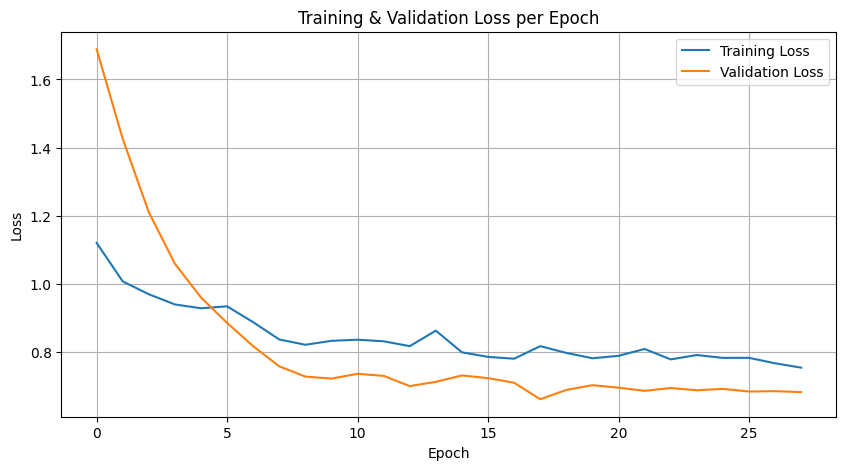

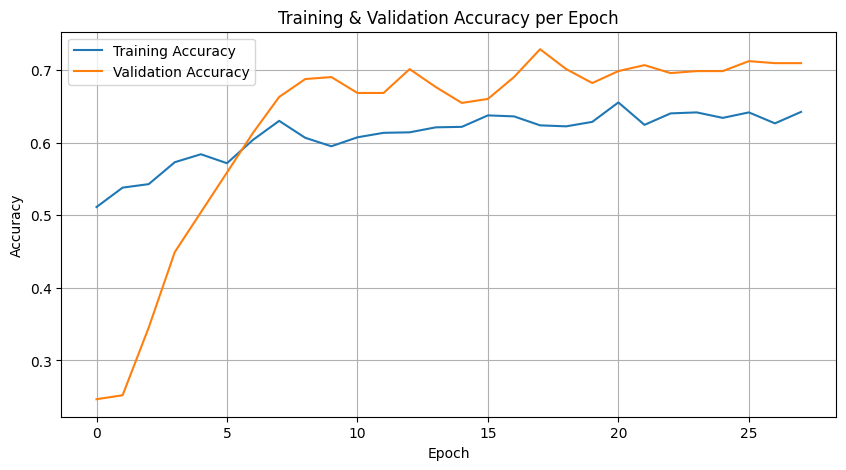

In [ ]:
# Visualisasi Training plot loss & accuracy per epoch
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Visualisasi Model**

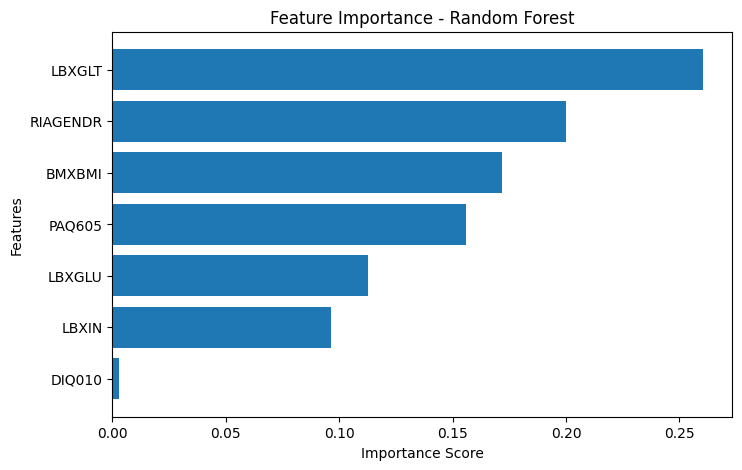

In [ ]:
#@title Plot Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

# Importance
importances = best_model_rf.feature_importances_
feature_names = X_train.columns

# DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


=== Logistic Regression ===


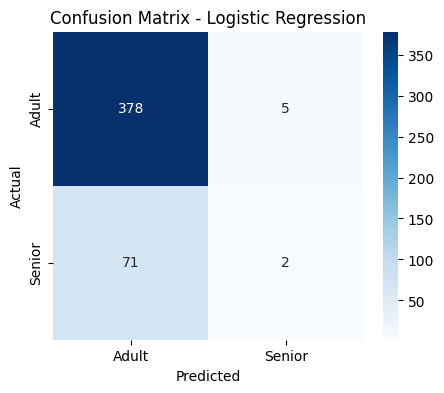


=== Random Forest ===


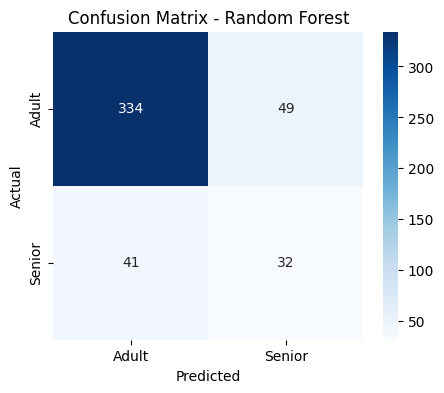


=== Deep Learning Model ===
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


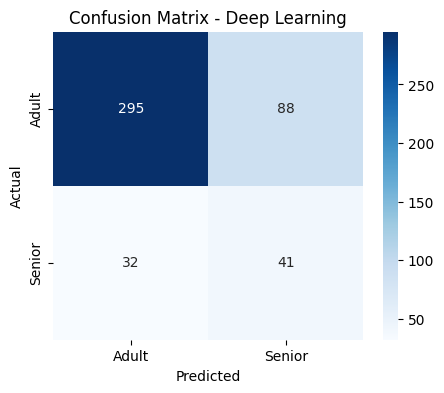

In [ ]:
#@title Confusion Matrix Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Plot Confusion Matrix
def plot_confmat(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Adult', 'Senior'],
                yticklabels=['Adult', 'Senior'])
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    return cm

# 2. Logistic Regression

print("=== Logistic Regression ===")
y_pred_lr = baseline_model.predict(X_test)
y_pred_lr = le.transform(y_pred_lr)

cm_lr = plot_confmat(y_test_encoded, y_pred_lr, "Confusion Matrix - Logistic Regression")

# 3. Random Forest

print("\n=== Random Forest ===")
y_pred_rf = best_model_rf.predict(X_test)
y_pred_rf = le.transform(y_pred_rf)

cm_rf = plot_confmat(y_test_encoded, y_pred_rf, "Confusion Matrix - Random Forest")

# 4. Deep Learning Model

print("\n=== Deep Learning Model ===")
y_pred_prob_dl = model.predict(X_test).ravel()
y_pred_dl = (y_pred_prob_dl > 0.5).astype(int)
cm_dl = plot_confmat(y_test_encoded, y_pred_dl, "Confusion Matrix - Deep Learning")

In [ ]:
#@title Test Set Prediksi

import pandas as pd

preview = pd.DataFrame({
    "Actual": y_test['age_group'].values[:10],
    "Predicted": le.inverse_transform(y_pred_dl[:10])
})

print(preview)


   Actual Predicted
0   Adult     Adult
1   Adult    Senior
2  Senior    Senior
3  Senior     Adult
4   Adult     Adult
5   Adult     Adult
6  Senior    Senior
7  Senior    Senior
8   Adult     Adult
9   Adult     Adult


# **Visualisasi perbandingan 3 Model**

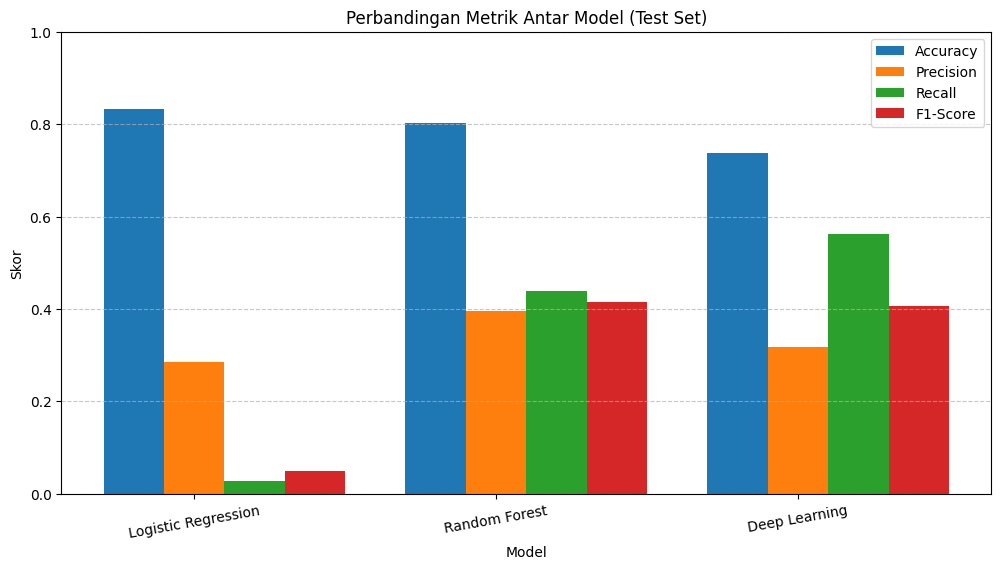

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nama Model
models = ["Logistic Regression", "Random Forest", "Deep Learning"]

# METRIK TEST SET
accuracy  = [0.8333, 0.8026, 0.7368]
precision = [0.2857, 0.3951, 0.3178]
recall    = [0.0274, 0.4384, 0.5616]
f1_score  = [0.0500, 0.4156, 0.4059]

# Dictionary untuk loop
metrics_dict = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score
}

# Plotting Bar Chart
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))

for i, (metric_name, metric_values) in enumerate(metrics_dict.items()):
    plt.bar(x + i * width - width, metric_values, width, label=metric_name)

plt.xticks(x, models, rotation=10)
plt.ylabel("Skor")
plt.xlabel("Model")
plt.title("Perbandingan Metrik Antar Model (Test Set)")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Save Model**

In [ ]:
import pickle

with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(baseline_model, f)

with open("random_forest.pkl", "wb") as f:
    pickle.dump(best_model_rf, f)

model.save("deep_learning_model.h5")